In [94]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

TABLE_DIR = "data/processed"

plt.rcParams["figure.figsize"] = (18, 10)


In [ ]:

# RIH02
rent_data = pd.read_csv(os.path.join(TABLE_DIR, "rent.csv"))
rent_data["Year"] = rent_data["Year"] + (rent_data["Year Half"] - 1) / 2

# HPM04
property_data = pd.read_csv(os.path.join(TABLE_DIR, "property.csv"))
property_data["Year"] = property_data["Year"] + (property_data["Year Half"] - 1) / 2

rent_data = rent_data.loc[
    (rent_data.Year >= property_data.Year.min())
    & (rent_data.Year <= property_data.Year.max())
]

property_data = property_data.loc[
    (property_data.Year >= rent_data.Year.min())
    & (property_data.Year <= rent_data.Year.max())
]

In [61]:
rent_data

,County,Type,Bedrooms,Year,Year Half,Rent
112,Carlow,All,All,2010.0,1,654.87
113,Carlow,All,All,2010.5,2,647.15
114,Carlow,All,All,2011.0,1,623.24
115,Carlow,All,All,2011.5,2,627.17
116,Carlow,All,All,2012.0,1,608.04
...,...,...,...,...,...,...
20380,Wicklow,All,All,2019.0,1,1226.75
20381,Wicklow,All,All,2019.5,2,1248.78
20382,Wicklow,All,All,2020.0,1,1272.96
20383,Wicklow,All,All,2020.5,2,1306.29


In [60]:
property_data

,County,Buyer Type,Year,Year Half,Execution Volume,Execution Mean Value,Filing Volume,Filing Mean Value
0,Carlow,All,2010.0,1,73,190022.0,82,200642.0
1,Carlow,All,2010.5,2,128,180017.0,108,186645.0
2,Carlow,All,2011.0,1,73,167643.0,123,176679.0
3,Carlow,All,2011.5,2,83,130350.0,96,143160.0
4,Carlow,All,2012.0,1,79,109258.0,82,121031.0
...,...,...,...,...,...,...,...,...
2490,Wicklow,Non-Occupier,2019.0,1,41,232695.0,45,238400.0
2491,Wicklow,Non-Occupier,2019.5,2,73,270006.0,70,239528.0
2492,Wicklow,Non-Occupier,2020.0,1,29,244621.0,32,312219.0
2493,Wicklow,Non-Occupier,2020.5,2,64,302620.0,65,290026.0


In [33]:
# CIA02
income_data = pd.read_csv(os.path.join(TABLE_DIR, "income.csv"))

income_data

,County,Year,Employee Income,Taxes Paid,Disposable Income per Household,Disposable Income per Person,Disposable Income per Person Minus Rent,Self Employed Income,Capital Gains,Primary Income,Income from Rent,Social Benefits,Total Income per Household,Total Income per Person
0,Carlow,2000,421,192,505,11617,10800,86,20,561,34,136,696,16034
1,Carlow,2001,461,201,573,12945,12192,93,21,616,41,158,774,17487
2,Carlow,2002,474,191,617,13398,12840,85,18,624,46,184,808,17555
3,Carlow,2003,515,209,661,14132,13572,92,23,675,45,195,870,18604
4,Carlow,2004,570,238,722,15146,14756,103,26,739,40,220,959,20133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,Wicklow,2014,2104,1155,2453,17730,15643,347,126,2827,250,782,3608,26082
490,Wicklow,2015,2296,1240,2609,18689,16602,353,124,3056,284,792,3849,27568
491,Wicklow,2016,2473,1293,2748,19472,17140,371,99,3239,297,802,4041,28630
492,Wicklow,2017,2765,1422,3020,21157,18897,394,142,3615,314,827,4442,31123


In [62]:
# E2004
population_data = pd.read_csv(os.path.join(TABLE_DIR, "population.csv"))

population_data

# B0102 1841 -> 2002
# C0103 2006

,County,Year,Rural Women,Rural Men,Town Women,Town Men
0,Carlow,2011,13708,14185,13473,13246
1,Carlow,2016,14342,14586,14125,13879
2,Cavan,2011,24976,26173,11194,10840
3,Cavan,2016,25952,26966,11894,11364
4,Clare,2011,35037,35778,23861,22520
5,Clare,2016,35994,36169,24038,22616
6,Cork,2011,96421,98849,104723,99809
7,Cork,2016,100336,101880,109922,105073
8,Donegal,2011,57721,59142,22893,21381
9,Donegal,2016,57750,58028,22420,20994


In [98]:
property_data = property_data.loc[property_data["Buyer Type"] == "All"]
execution_volume = property_data["Execution Volume"]
filing_volume = property_data["Filing Volume"]
volume = execution_volume + filing_volume
property_data["Volume"] = volume
property_data["Mean Value"] = (
    execution_volume * property_data["Execution Mean Value"]
    + filing_volume * property_data["Filing Mean Value"]
) / volume
property_data

,County,Buyer Type,Year,Year Half,Execution Volume,Execution Mean Value,Filing Volume,Filing Mean Value,Volume,Mean Value
0,Carlow,All,2010.0,1,73,190022.0,82,200642.0,155,195640.322581
1,Carlow,All,2010.5,2,128,180017.0,108,186645.0,236,183050.152542
2,Carlow,All,2011.0,1,73,167643.0,123,176679.0,196,173313.551020
3,Carlow,All,2011.5,2,83,130350.0,96,143160.0,179,137220.167598
4,Carlow,All,2012.0,1,79,109258.0,82,121031.0,161,115254.186335
...,...,...,...,...,...,...,...,...,...,...
2418,Wicklow,All,2019.0,1,596,355654.0,602,350721.0,1198,353175.146912
2419,Wicklow,All,2019.5,2,939,382572.0,928,377614.0,1867,380107.605785
2420,Wicklow,All,2020.0,1,447,376558.0,492,385940.0,939,381473.808307
2421,Wicklow,All,2020.5,2,858,407685.0,804,404828.0,1662,406302.913357


<module 'matplotlib.pyplot' from '/usr/lib/python3.9/site-packages/matplotlib/pyplot.py'>

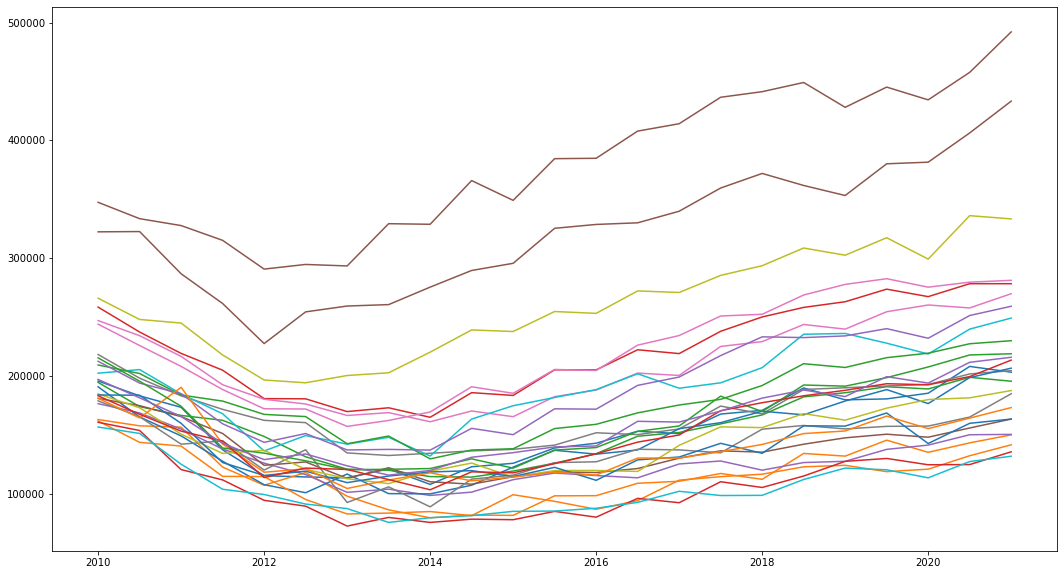

In [101]:
for county, df in property_data.groupby('County'):
    plt.plot(df['Year'], df['Mean Value'], label=county)
plt

In [65]:
rent_data = rent_data.loc[(rent_data["Type"] == "All") & (rent_data["Bedrooms"] == "All")]
rent_data

,County,Type,Bedrooms,Year,Year Half,Rent
112,Carlow,All,All,2010.0,1,654.87
113,Carlow,All,All,2010.5,2,647.15
114,Carlow,All,All,2011.0,1,623.24
115,Carlow,All,All,2011.5,2,627.17
116,Carlow,All,All,2012.0,1,608.04
...,...,...,...,...,...,...
20380,Wicklow,All,All,2019.0,1,1226.75
20381,Wicklow,All,All,2019.5,2,1248.78
20382,Wicklow,All,All,2020.0,1,1272.96
20383,Wicklow,All,All,2020.5,2,1306.29


<module 'matplotlib.pyplot' from '/usr/lib/python3.9/site-packages/matplotlib/pyplot.py'>

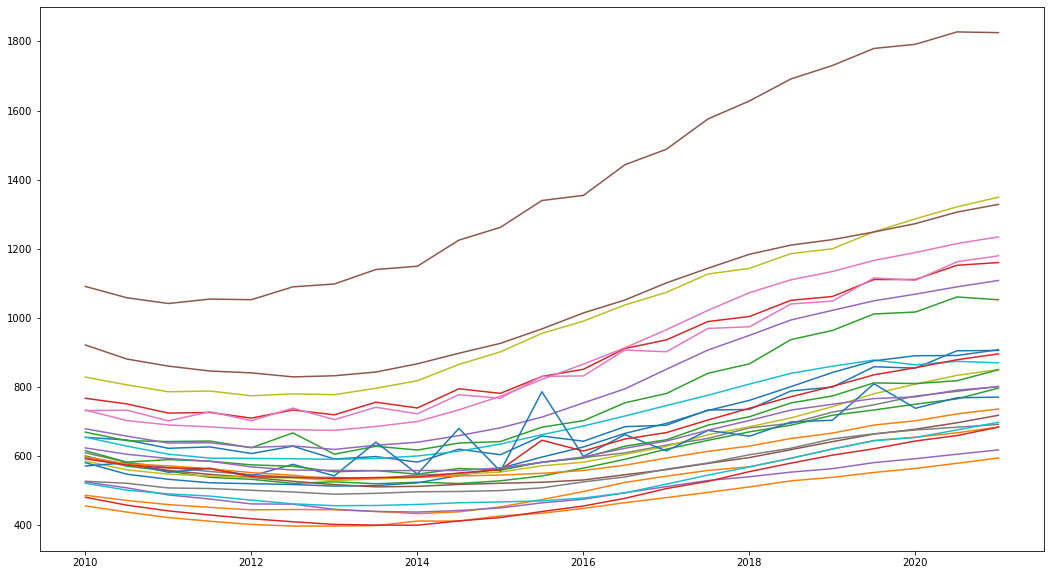

In [102]:
for county, df in rent_data.groupby('County'):
    plt.plot(df['Year'], df['Rent'], label=county)
plt

In [99]:
X = 'Mean Value'
Y = 'Rent'
rent_and_property = pd.merge(rent_data, property_data,  how='left', left_on=['County', 'Year'], right_on = ['County','Year'])
rent_and_property = rent_and_property.sort_values(by=X)
rent_and_property


,County,Type,Bedrooms,Year,Year Half_x,Rent,Buyer Type,Year Half_y,Execution Volume,Execution Mean Value,Filing Volume,Filing Mean Value,Volume,Mean Value
305,Longford,All,All,2013.0,1,403.03,All,1,89,70057.6,105,74479.5,194,72450.896392
444,Roscommon,All,All,2013.5,2,457.79,All,2,215,74806.1,198,76379.4,413,75560.369734
307,Longford,All,All,2014.0,1,400.75,All,1,131,74720.0,141,76357.1,272,75568.643750
309,Longford,All,All,2015.0,1,422.86,All,1,211,80265.6,232,75705.4,443,77877.413995
308,Longford,All,All,2014.5,2,413.20,All,2,232,77408.0,208,79363.1,440,78332.229091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Dublin,All,All,2018.0,1,1627.72,All,1,6439,442599.0,6550,440106.0,12989,441341.847794
134,Dublin,All,All,2019.5,2,1779.63,All,2,8244,443548.0,8067,446978.0,16311,445244.389553
132,Dublin,All,All,2018.5,2,1691.44,All,2,8221,448427.0,8165,449884.0,16386,449153.010314
136,Dublin,All,All,2020.5,2,1827.47,All,2,6530,459499.0,6224,455919.0,12754,457751.946527


<module 'matplotlib.pyplot' from '/usr/lib/python3.9/site-packages/matplotlib/pyplot.py'>

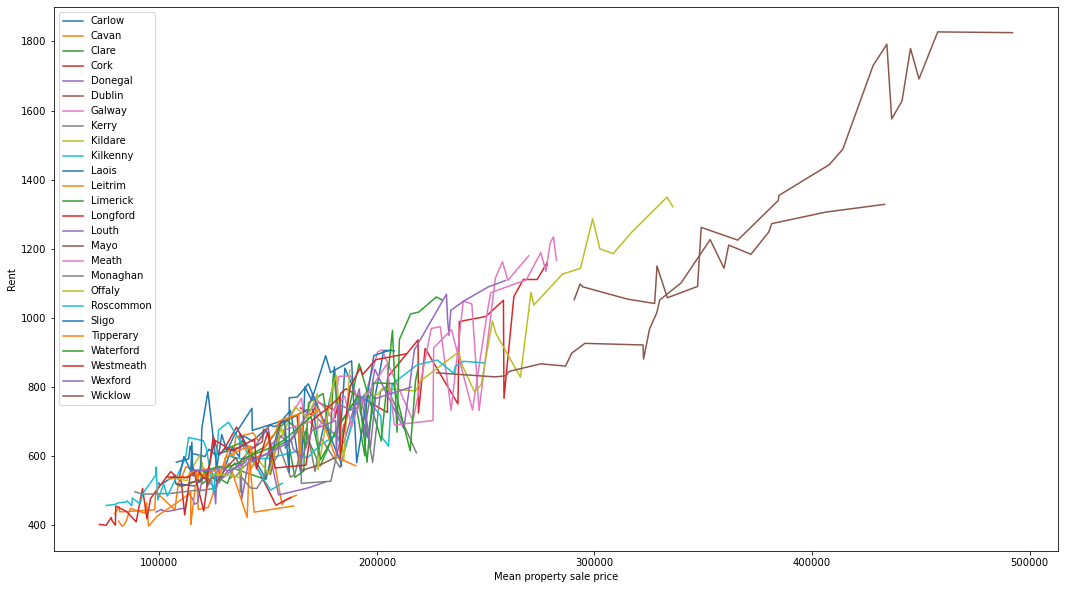

In [100]:

def filter_by_county(data, county, negate=False):
    return data.loc[(data["County"] == county) != negate]

#rent_and_property = filter_by_county(rent_and_property, "Dublin", negate=True)

for county, df in rent_and_property.groupby('County'):
    plt.plot(df[X], df[Y], label=county)
plt.xlabel("Mean property sale price")
plt.ylabel(Y)
plt.legend()
plt

In [119]:
variables = [
    "Mean Value",
    "Filing Mean Value",
    "Execution Mean Value",
    "Rent",
]
input_columns = np.array([rent_and_property[variable].to_numpy() for variable in variables])
input_columns
np.corrcoef(input_columns)

array([[1.        , 0.99941222, 0.99921841, 0.92999241],
       [0.99941222, 1.        , 0.99729168, 0.92483548],
       [0.99921841, 0.99729168, 1.        , 0.93461697],
       [0.92999241, 0.92483548, 0.93461697, 1.        ]])